# Homework 1 (Regression)
Some of my plot labels are overlapping even when specified rotated and others seem squished vertically. I assume this is due to me working on a 13 inch screen but if it's something I'm doing wrong please let me know how I can rectify it

Additionally, when I downloaded the homework files it did not include a notebook file so I had to make my own 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [3]:
cars_df = pd.read_csv('car_data.csv')
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are no missing values, there are 205 rows in the dataset and all the variables have 205 non-null values

## Part 2. Data Cleaning and Preparation

In [6]:
#Splits the Series of car names into a new series split at the space in the strings
names = cars_df['CarName'].str.split(' ')

man = np.zeros(205, dtype=object)

#Loops through all 205 rows and takes the vehicle manufacturer in lowercase and adds it to an array of manufacturers
for i in range(0, 205):
    man[i] = names[i][0].lower()

# Adds the array of manufacturers to the dataframe as a new column
cars_df['car_company'] = man

In [7]:
print('The unique companies in our dataset are:\n\n', cars_df['car_company'].unique())

The unique companies in our dataset are:

 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [8]:
cars_df['car_company'] = cars_df['car_company'].replace('maxda', 'mazda')
cars_df['car_company'] = cars_df['car_company'].replace('porcshce', 'porsche')
cars_df['car_company'] = cars_df['car_company'].replace('toyouta', 'toyota')
cars_df['car_company'] = cars_df['car_company'].replace('vokswagen', 'volkswagen')
cars_df['car_company'] = cars_df['car_company'].replace('vw', 'volkswagen')

In [9]:
print('The unique companies in our dataset are:\n\n', cars_df['car_company'].unique())

The unique companies in our dataset are:

 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


## Part 3. Visualising Categorical Data

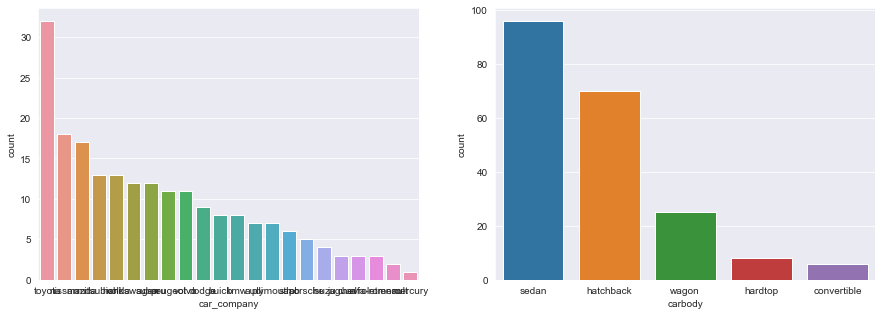

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x=cars_df['car_company'], order=cars_df['car_company'].value_counts().index, ax=axes[0])
plt.xticks(rotation=90)

sns.countplot(x=cars_df['carbody'], order=cars_df['carbody'].value_counts().index, ax=axes[1])
plt.xticks(rotation=0)

plt.show()

From these plots we can conslude that most of the vehicles are either sedans or hatchbacks from Japanese or European brands

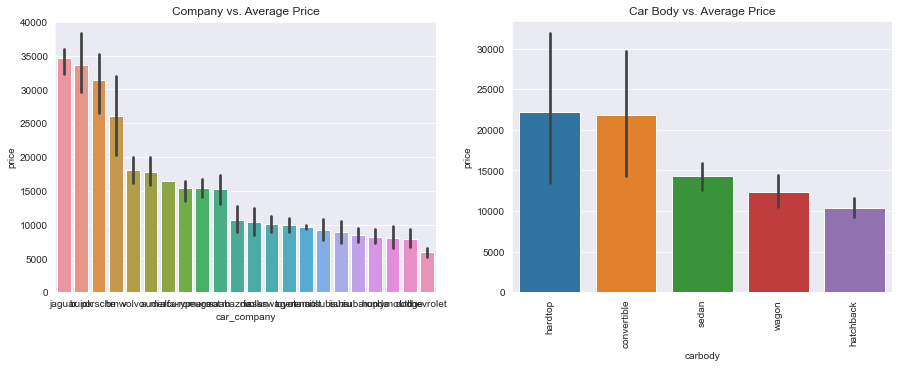

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].title.set_text('Company vs. Average Price')
sns.barplot(x=cars_df['car_company'], y=cars_df['price'], order=['jaguar', 'buick', 'porsche', 'bmw', 'volvo', 'audi', 'mercury', 'alfa-romero', 'peugeot', 'saab', 'mazda', 'nissan', 'volkswagen', 'toyota', 'renault', 'mitsubishi', 'isuzu', 'subaru', 'honda', 'plymouth', 'dodge', 'chevrolet'], ax=axes[0])
plt.xticks(rotation=90)

axes[1].title.set_text('Car Body vs. Average Price')
sns.barplot(x=cars_df['carbody'], y=cars_df['price'], order=['hardtop', 'convertible', 'sedan', 'wagon', 'hatchback'], ax=axes[1])
plt.show()

From these plots we can conclude that luxury car makers have the highest average prices relative to the more economy manufacturers like subaru. And among the car makes in the dataset hard tops and convertibles had the highest average prices, whereas sedans, wagons, and hatchbacks which would be more likely family cars were much cheaper. Additionally the deviation among the more expensive cars was greater suggesting a weaker correlation than the cheaper cars

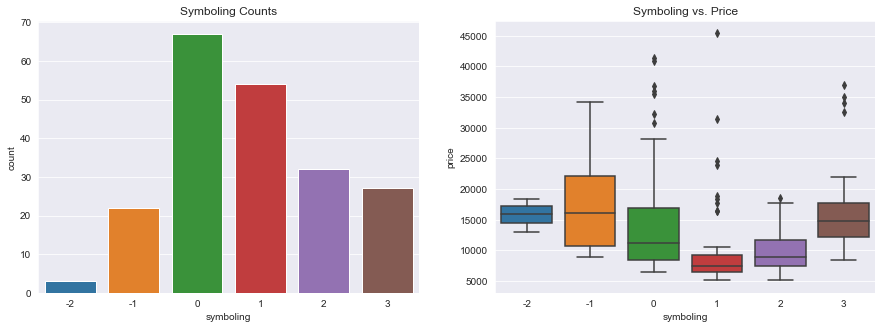

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].title.set_text('Symboling Counts')
sns.countplot(x=cars_df['symboling'], ax=axes[0])

axes[1].title.set_text('Symboling vs. Price')
sns.boxplot(x=cars_df['symboling'], y=cars_df['price'], ax=axes[1])

plt.show()

From these plots it seems that the amount of symboling per car has little to no effect on it's average price

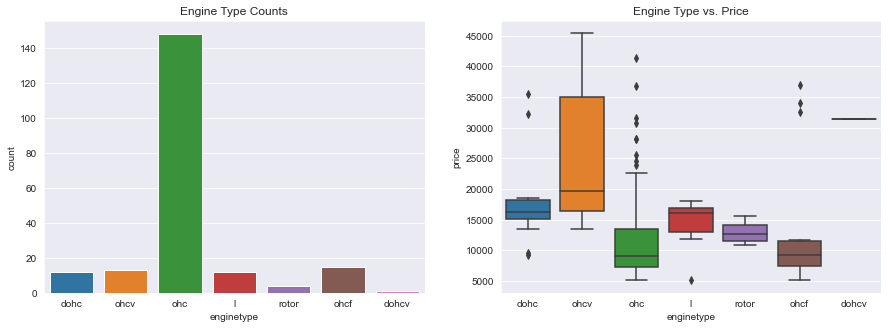

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].title.set_text('Engine Type Counts')
sns.countplot(x=cars_df['enginetype'], ax=axes[0])

axes[1].title.set_text('Engine Type vs. Price')
sns.boxplot(x=cars_df['enginetype'], y=cars_df['price'], ax=axes[1])

plt.show()

These plots show that the data is heavily skewed towards overhead cam engine cars which could lead to slanted data. The other engine types have much smaller sample numbers which makes them more sensitive so spread and outliers such as ohcv and ohcf

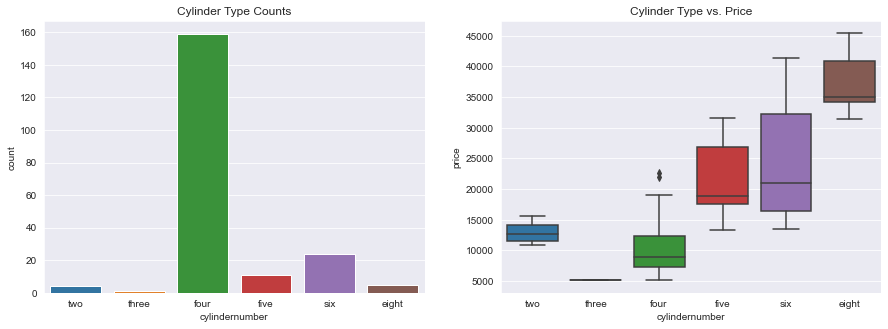

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].title.set_text('Cylinder Type Counts')
sns.countplot(x=cars_df['cylindernumber'], order=['two', 'three', 'four', 'five', 'six', 'eight'], ax=axes[0])

axes[1].title.set_text('Cylinder Type vs. Price')
sns.boxplot(x=cars_df['cylindernumber'], y=cars_df['price'], order=['two', 'three', 'four', 'five', 'six', 'eight'],ax=axes[1])

plt.show()

From this data we can see a strong correlation between cylinder number and price with the slight exception of two cylinders since they are mostly found in specialty vehicles or motorcycles 

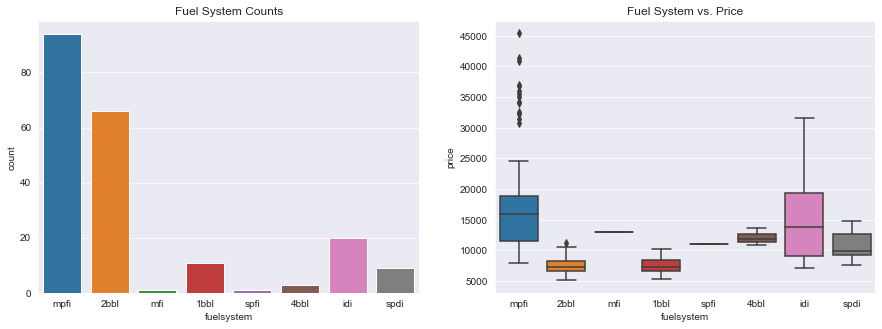

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].title.set_text('Fuel System Counts')
sns.countplot(x=cars_df['fuelsystem'], order=['mpfi','2bbl','mfi','1bbl','spfi','4bbl','idi','spdi'], ax=axes[0])

axes[1].title.set_text('Fuel System vs. Price')
sns.boxplot(x=cars_df['fuelsystem'], y=cars_df['price'], order=['mpfi','2bbl','mfi','1bbl','spfi','4bbl','idi','spdi'] ,ax=axes[1])

plt.show()

Again with these plots, the data is heavily skewed in terms of count towards mpfi and 2bbl however from the data we do have there does not seem to be a significant correlation between the type of fuel system and price

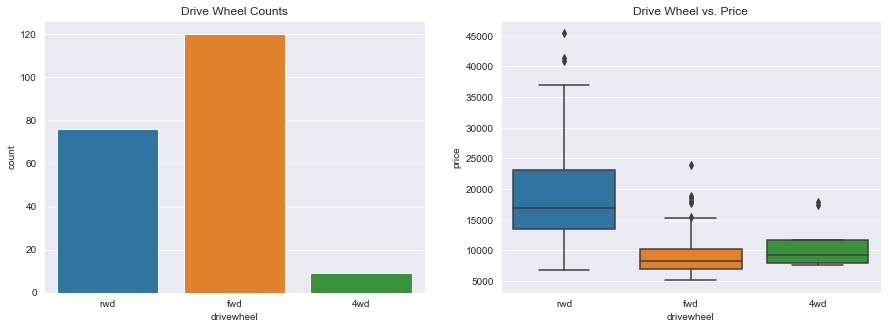

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].title.set_text('Drive Wheel Counts')
sns.countplot(x=cars_df['drivewheel'], order=['rwd','fwd','4wd'], ax=axes[0])

axes[1].title.set_text('Drive Wheel vs. Price')
sns.boxplot(x=cars_df['drivewheel'], y=cars_df['price'], order=['rwd','fwd','4wd'] ,ax=axes[1])

plt.show()

Here the dataset has a relatively small number of 4wd samples however there does seem to be a relationship between at least rwd and fwd that is, front wheel drive is on average much cheaper that rear wheel drive. But rear wheel drive has much more of a spread.

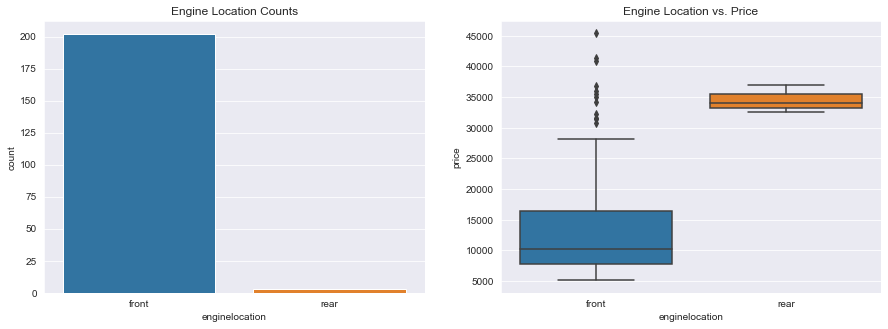

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].title.set_text('Engine Location Counts')
sns.countplot(x=cars_df['enginelocation'], ax=axes[0])

axes[1].title.set_text('Engine Location vs. Price')
sns.boxplot(x=cars_df['enginelocation'], y=cars_df['price'],ax=axes[1])

plt.show()

This plot shows an overwhelming disparity between front and rear engine cars in the dataset (likely only the Porsches). However from the limited data we have an obvious trend is that rear engine cars are more expensive than nearly all front engine cars. The front engine boxplot shows the high degree of variability we would expect with such a large percentage of our data in that 1 category

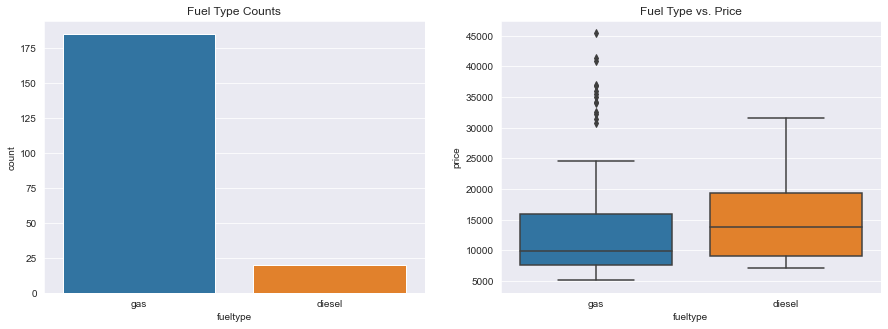

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].title.set_text('Fuel Type Counts')
sns.countplot(x=cars_df['fueltype'], ax=axes[0])

axes[1].title.set_text('Fuel Type vs. Price')
sns.boxplot(x=cars_df['fueltype'], y=cars_df['price'],ax=axes[1])

plt.show()

Here the number of gas vehicles also greatly outnumbers the number of diesels and we see what may be a slight increase in average price for the diesels over gas but the variablility of the gas vehicles and the small number of diesels make this conclusion hard to draw without further analysis

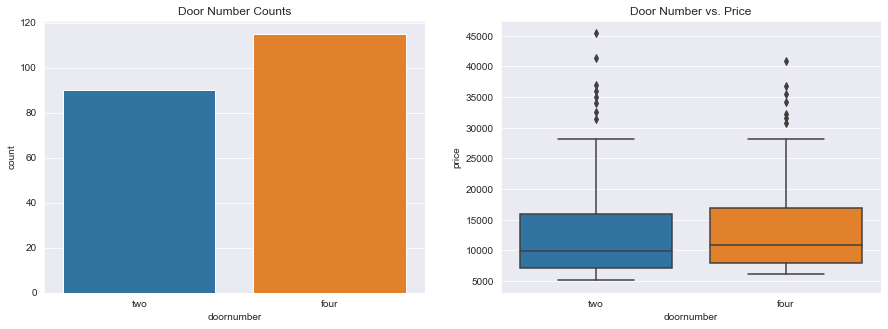

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].title.set_text('Door Number Counts')
sns.countplot(x=cars_df['doornumber'], ax=axes[0])

axes[1].title.set_text('Door Number vs. Price')
sns.boxplot(x=cars_df['doornumber'], y=cars_df['price'],ax=axes[1])

plt.show()

The dataset contains a relatively equal number of 2 door vs 4 door vehicles and from that we can see that there does not appear to be a strong relationship in price to number of doors

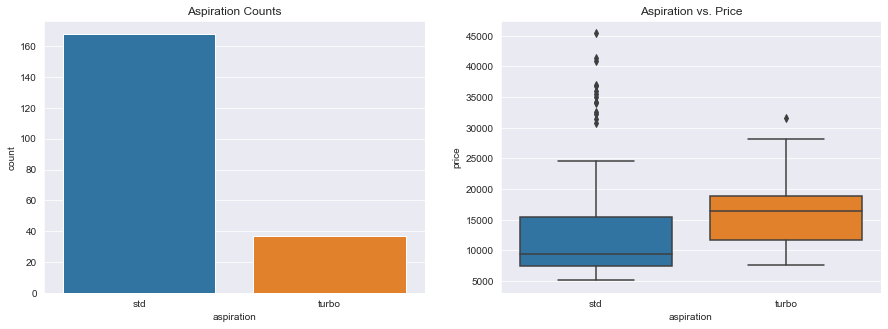

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].title.set_text('Aspiration Counts')
sns.countplot(x=cars_df['aspiration'], ax=axes[0])

axes[1].title.set_text('Aspiration vs. Price')
sns.boxplot(x=cars_df['aspiration'], y=cars_df['price'],ax=axes[1])

plt.show()

There is an increase in average price when it comes to switching to turbo aspiration which is inline with the extra costs associated with the hardware

## Part 4. Visualising Numerical Data

C:\Users\bryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


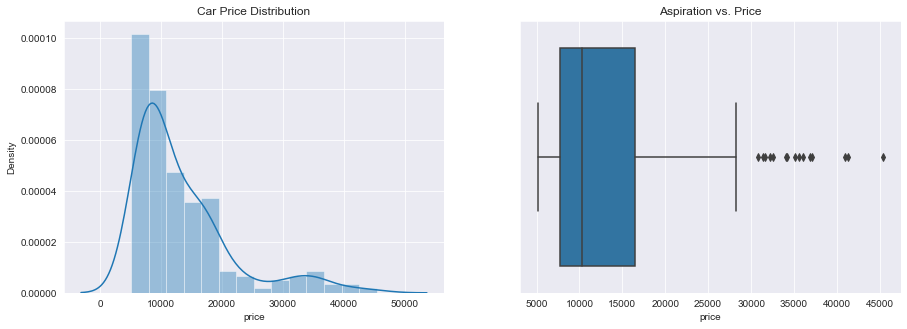

In [21]:
numerical = ['price','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','wheelbase','citympg','highwaympg']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].title.set_text('Car Price Distribution')
sns.distplot(a=cars_df['price'], ax=axes[0])

axes[1].title.set_text('Aspiration vs. Price')
sns.boxplot(x=cars_df['price'], ax=axes[1])


plt.show()

These plots show us the distribution of the car prices in the dataset as well as the density function. From this we can see the likeliood of a rendomly picked car being at any give price point

<AxesSubplot:title={'center':'Car Weight vs. Price'}, xlabel='curbweight', ylabel='price'>

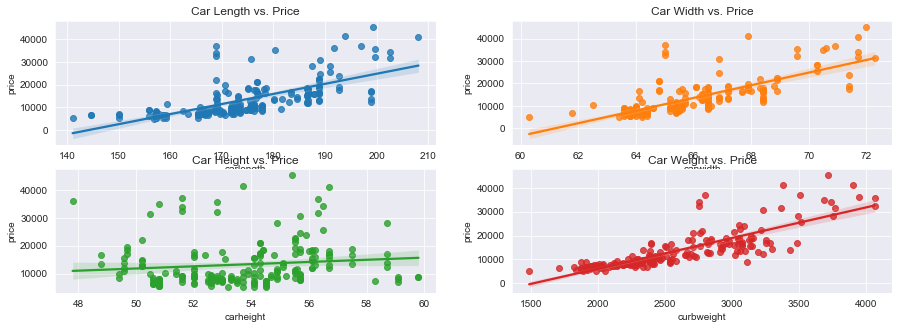

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

axes[0][0].title.set_text('Car Length vs. Price')
sns.regplot(x=cars_df['carlength'], y=cars_df['price'], color='tab:blue', ax=axes[0][0])

axes[0][1].title.set_text('Car Width vs. Price')
sns.regplot(x=cars_df['carwidth'], y=cars_df['price'], color='tab:orange', ax=axes[0][1])

axes[1][0].title.set_text('Car Height vs. Price')
sns.regplot(x=cars_df['carheight'], y=cars_df['price'], color='tab:green', ax=axes[1][0])

axes[1][1].title.set_text('Car Weight vs. Price')
sns.regplot(x=cars_df['curbweight'], y=cars_df['price'], color='tab:red', ax=axes[1][1])

From these plots we can conclude that there does seem to be a positive correlation between length, width, and weight to price. The height seems to not have a strong correlation

<AxesSubplot:title={'center':'Highway MPG vs. Price'}, xlabel='highwaympg', ylabel='price'>

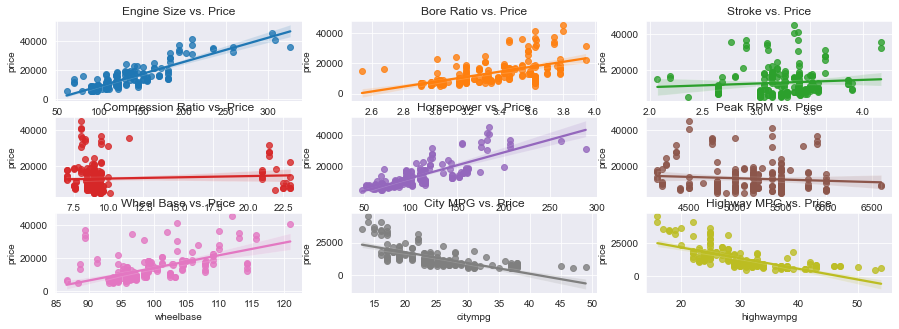

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 5))

axes[0][0].title.set_text('Engine Size vs. Price')
sns.regplot(x=cars_df['enginesize'], y=cars_df['price'], color='tab:blue', ax=axes[0][0])

axes[0][1].title.set_text('Bore Ratio vs. Price')
sns.regplot(x=cars_df['boreratio'], y=cars_df['price'], color='tab:orange', ax=axes[0][1])

axes[0][2].title.set_text('Stroke vs. Price')
sns.regplot(x=cars_df['stroke'], y=cars_df['price'], color='tab:green', ax=axes[0][2])


axes[1][0].title.set_text('Compression Ratio vs. Price')
sns.regplot(x=cars_df['compressionratio'], y=cars_df['price'], color='tab:red', ax=axes[1][0])

axes[1][1].title.set_text('Horsepower vs. Price')
sns.regplot(x=cars_df['horsepower'], y=cars_df['price'], color='tab:purple', ax=axes[1][1])

axes[1][2].title.set_text('Peak RPM vs. Price')
sns.regplot(x=cars_df['peakrpm'], y=cars_df['price'], color='tab:brown', ax=axes[1][2])


axes[2][0].title.set_text('Wheel Base vs. Price')
sns.regplot(x=cars_df['wheelbase'], y=cars_df['price'], color='tab:pink', ax=axes[2][0])

axes[2][1].title.set_text('City MPG vs. Price')
sns.regplot(x=cars_df['citympg'], y=cars_df['price'], color='tab:grey', ax=axes[2][1])

axes[2][2].title.set_text('Highway MPG vs. Price')
sns.regplot(x=cars_df['highwaympg'], y=cars_df['price'], color='tab:olive', ax=axes[2][2])

These plots give us an idea of how certain engine characteristics relate to price of vehicles. Those with a positive correlation: Engine size, bore ratio, horsepower, wheelbase. Negative correlation: City MPG, highway MPG. No correlation: Stroke, compression ratio

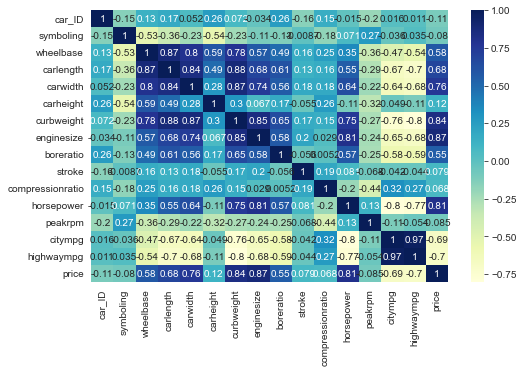

In [24]:
sns.heatmap(cars_df.corr(), cmap='YlGnBu', annot=True)
plt.show()

Some of these features clearly stand out as being similar. Most notably is city MPG and highway MPG which have a correlation of 0.97 and should clearly be combined into a single category. Other candidates would be carwidth and wheelbase, as well as carlength and curbweight

In [25]:
cars_df['fuel_economy'] = ((0.55 * cars_df['citympg']) + (0.45 * cars_df['highwaympg']))
cars_df.drop(labels='citympg', axis=1, inplace=True)
cars_df.drop(labels='highwaympg', axis=1, inplace=True)

In [26]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_company,fuel_economy
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,23.70
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,23.70
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.15
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,26.70
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,19.80


In general the factors that seems to most affect the price of a vehicle are the engine's size and placement, as well as the overall size and weight of the car

## Part 5. Data Pre-Processing

In [27]:
cars_df.drop(labels='car_company', axis=1, inplace=True)
cars_df.drop(labels='car_ID', axis=1, inplace=True)
cars_df.drop(labels='CarName', axis=1, inplace=True)

In [28]:
cars_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fuel_economy
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80


In [29]:
categoricals = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
cars_df = pd.get_dummies(data=cars_df, columns=categoricals, drop_first=True)

In [40]:
from sklearn.preprocessing import RobustScaler

X = cars_df.drop('price', axis=1)

# create our scaler object
scaler = RobustScaler()

# use our scaler object to transform/scale our data and save it into X_scaled. Only need to
# transform numerical data.
X_scaled = scaler.fit_transform(X)
y = scaler.fit_transform(cars_df['price'])

# reassign X[numericals] to the transformed numerical data.
X = X_scaled

ValueError: Expected 2D array, got 1D array instead:
array=[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    13645.    15645.     8845.     8495.    10595.    10245.
 10795.    11245.    18280.    18344.    25552.    28248.    28176.
 31600.    34184.    35056.    40960.    45400.    16503.     5389.
  6189.     6669.     7689.     9959.     8499.    12629.    14869.
 14489.     6989.     8189.     9279.     9279.     5499.     7099.
  6649.     6849.     7349.     7299.     7799.     7499.     7999.
  8249.     8949.     9549.    13499.    14399.    13499.    17199.
 19699.    18399.    11900.    13200.    12440.    13860.    15580.
 16900.    16695.    17075.    16630.    17950.    18150.     5572.
  7957.     6229.     6692.     7609.     8921.    12764.    22018.
 32528.    34028.    37028.    31400.5    9295.     9895.    11850.
 12170.    15040.    15510.    18150.    18620.     5118.     7053.
  7603.     7126.     7775.     9960.     9233.    11259.     7463.
 10198.     8013.    11694.     5348.     6338.     6488.     6918.
  7898.     8778.     6938.     7198.     7898.     7788.     7738.
  8358.     9258.     8058.     8238.     9298.     9538.     8449.
  9639.     9989.    11199.    11549.    17669.     8948.    10698.
  9988.    10898.    11248.    16558.    15998.    15690.    15750.
  7775.     7975.     7995.     8195.     8495.     9495.     9995.
 11595.     9980.    13295.    13845.    12290.    12940.    13415.
 15985.    16515.    18420.    18950.    16845.    19045.    21485.
 22470.    22625.   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Part 6. Model Creation and Evaluation

In [35]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

C:\Users\bryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


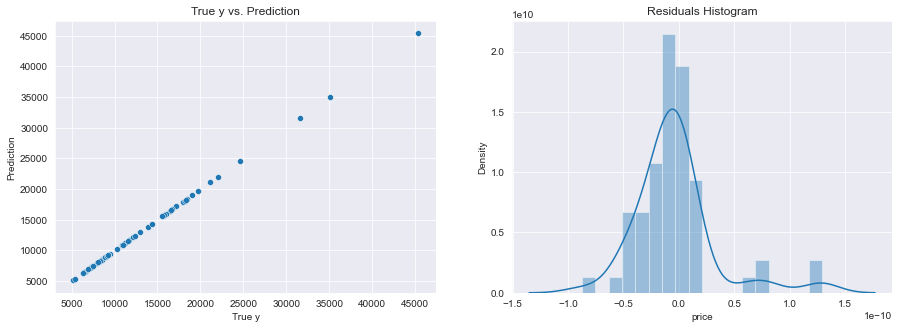

R2 Score:  1.0


In [36]:
predictions = lm.predict(X_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].title.set_text('True y vs. Prediction')
axes[0].set_xlabel('True y')
axes[0].set_ylabel('Prediction')
sns.scatterplot(x=y_test, y=predictions, ax=axes[0])

axes[1].title.set_text('Residuals Histogram')
residuals = y_test - predictions
sns.distplot(residuals)
plt.show()

plt.show()

from sklearn.metrics import r2_score

print('R2 Score: ', r2_score(y_test, predictions))

In [53]:
cars = cars_df.drop('price', axis=1)
cars.head()
cars_df.columns
tmp2 = cars_df.drop('price', axis=1)
columns2 = cars_df.drop('price', axis=1).columns
coeffcients = pd.DataFrame(data=lm.coef_, index=columns2, columns=['Coeff'])
coeffcients

,Coeff
symboling,295.460543
wheelbase,270.228506
carlength,-563.176527
carwidth,1748.736811
carheight,230.219000
curbweight,4316.716329
enginesize,5790.327142
boreratio,-2135.342432
stroke,-1648.322684
compressionratio,-173.744622


These are all the coefficients for the linear regression model. The larger the coefficient the more impact it has on the slope of the regression. All of these values are combined to form one single regression line that is our model. From this regression we can see consistently over 0.9 R^2 Score which means the model is very well fitted on the data and performs predictions well which also tells us that overfitting is not an issue